In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_ice = pd.read_csv('input/icecream.csv', skiprows=2,header=None)
df_ice.columns = ['year', 'month', 'expenditure_yen']

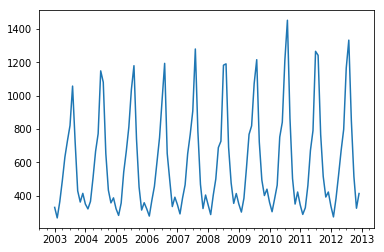

In [4]:
y = pd.Series(df_ice.expenditure_yen.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [5]:
from statsmodels.tsa import stattools

ctt = stattools.adfuller(y[:100], regression='ctt')
ct = stattools.adfuller(y[:100], regression='ct')
c = stattools.adfuller(y[:100], regression='c')
nc = stattools.adfuller(y[:100], regression='nc')
print(ctt)
print(ct)
print(c)
print(nc)

(-3.3089558508822066, 0.1692244861968651, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
(-1.714560199971079, 0.7444294601457553, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
(-0.6539247687694223, 0.8583259363632658, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
(1.6310949179759076, 0.9751761218376866, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


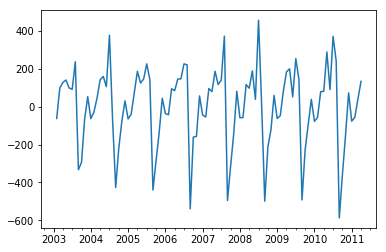

In [6]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [7]:
ctt = stattools.adfuller(y_diff, regression='ctt')
ct = stattools.adfuller(y_diff, regression='ct')
c = stattools.adfuller(y_diff, regression='c')
nc = stattools.adfuller(y_diff, regression='nc')
print(ctt)
print(ct)
print(c)
print(nc)

(-20.49413879057406, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214956)
(-20.51282538674093, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902557)
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415186)
(-20.337724459102365, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068397)


In [8]:
from statsmodels.tsa import ar_model
model = ar_model.AR(y_diff)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_D

In [11]:
for i in range(20):
    results = model.fit(maxlag=i+1)
    model = ar_model.AR(y_diff)
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  10.623349835083612
lag =  2 aic :  10.605625887136187
lag =  3 aic :  10.631794365499909
lag =  4 aic :  10.653968819566964
lag =  5 aic :  10.639020494849978
lag =  6 aic :  10.497805079154896
lag =  7 aic :  10.50164556083358
lag =  8 aic :  10.347418412668333
lag =  9 aic :  10.145773136713263
lag =  10 aic :  9.547393191591683
lag =  11 aic :  8.688494352586085
lag =  12 aic :  8.726168706454176
lag =  13 aic :  8.749080458269447
lag =  14 aic :  8.787463716774608
lag =  15 aic :  8.822181088075927
lag =  16 aic :  8.861619646480914
lag =  17 aic :  8.900710667979508
lag =  18 aic :  8.712739176754758
lag =  19 aic :  8.74636247304398
lag =  20 aic :  8.766450545272324


In [12]:
model = ar_model.AR(y_diff)
results11 = model.fit(maxlag=12, ic='aic')

In [13]:
results11.k_ar

11

In [14]:
res11 = results11.resid

<BarContainer object of 88 artists>

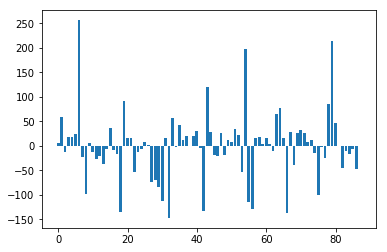

In [15]:
plt.bar(range(len(res11)), res11)

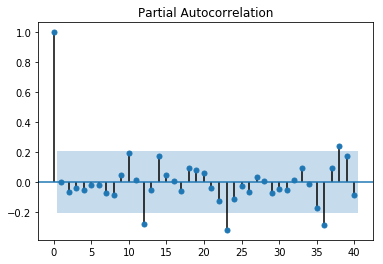

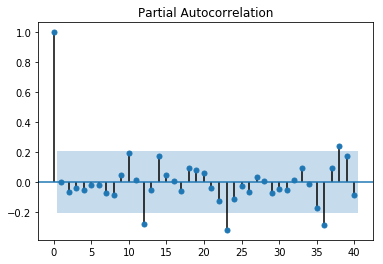

In [16]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(res11, lags=40)

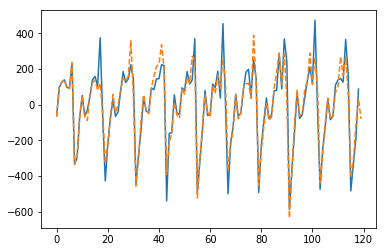

In [17]:
plt.plot(y.diff().dropna().values, label='observation')
plt.plot(np.hstack([y_diff[:11], results11.fittedvalues, results11.predict(98-11, 107, dynamic=True)]), '--', label='forecast')

In [19]:
from statsmodels.tsa import stattools
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
info_criteria.aic_min_order, info_criteria.bic_min_order

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


((2, 2), (2, 2))

In [20]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(y_diff, (2,2))
results = model.fit()

In [21]:
res = results.resid

<BarContainer object of 99 artists>

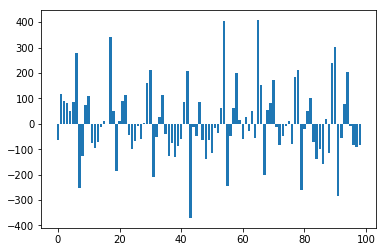

In [22]:
plt.bar(range(len(res)), res)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


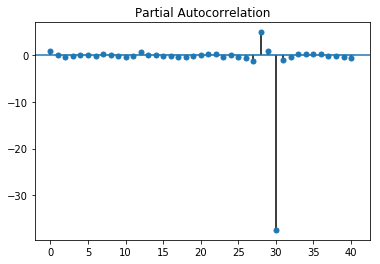

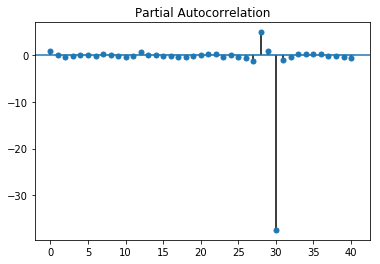

In [23]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(res, lags=40)

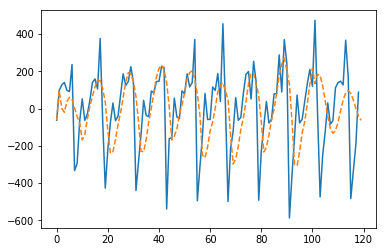

In [27]:
plt.plot(y.diff().dropna().values, label='observation')
plt.plot(np.hstack([y_diff[:2],results.fittedvalues,results.predict(99-2,115,dynamic=True)]),'--',label='forecast')

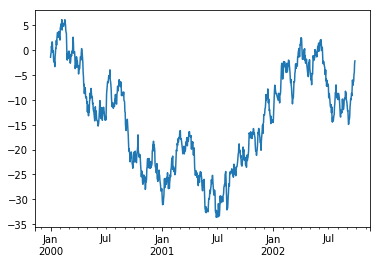

In [28]:
y = pd.Series(np.random.randn(1000), index=pd.date_range('2000-1-1', periods=1000))
y = y.cumsum()
y.plot()

In [30]:
from statsmodels.tsa import stattools
ctt = stattools.adfuller(y, regression='ctt')
ct = stattools.adfuller(y, regression='ct')
c = stattools.adfuller(y, regression='c')
nc = stattools.adfuller(y, regression='nc')
print(ctt)
print(ct)
print(c)
print(nc)

(-2.9796921382542516, 0.3049526406271427, 3, 996, {'1%': -4.382801184324198, '5%': -3.838332127908256, '10%': -3.5569396971160314}, 2744.5449002346004)
(-2.0038867629415007, 0.5993148646604294, 3, 996, {'1%': -3.9678882504050086, '5%': -3.41490718677544, '10%': -3.1296499631758756}, 2746.4632309815697)
(-1.989845370106567, 0.2910432231814395, 3, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2746.8970343234623)
(-1.0810020428122085, 0.25280443294403265, 3, 996, {'1%': -2.567988435307495, '5%': -1.9412730391965518, '10%': -1.6165560435054842}, 2748.1644074971828)


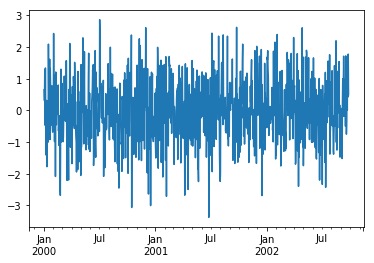

In [31]:
y_diff = y.diff().dropna()
y_diff.plot()

In [32]:
ctt = stattools.adfuller(y_diff, regression='ctt')
ct = stattools.adfuller(y_diff, regression='ct')
c = stattools.adfuller(y_diff, regression='c')
nc = stattools.adfuller(y_diff, regression='nc')
print(ctt)
print(ct)
print(c)
print(nc)

(-15.846675798487983, 1.6990309240651863e-24, 2, 996, {'1%': -4.382801184324198, '5%': -3.838332127908256, '10%': -3.5569396971160314}, 2748.915985654864)
(-15.852824270407258, 1.1706845422689458e-22, 2, 996, {'1%': -3.9678882504050086, '5%': -3.41490718677544, '10%': -3.1296499631758756}, 2747.16601070386)
(-15.79737140246917, 1.0842100731256007e-28, 2, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2747.28791879635)
(-15.805094107221601, 1.5164616464961816e-27, 2, 996, {'1%': -2.567988435307495, '5%': -1.9412730391965518, '10%': -1.6165560435054842}, 2745.3115463798886)
